# Лабораторная работа 2
# Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

### Воронов К.М., М8О-407Б-19

Цель работы: исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

Вариант 19

In [ ]:
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def f1(t):
    return np.sin(-2 * np.sin(t) * t * t + 7)

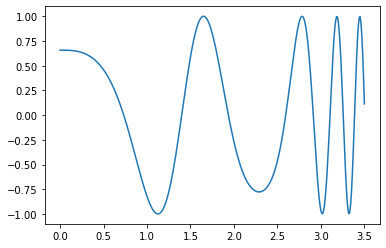

In [ ]:
fig, ax = pylab.subplots(1, 1)
t =  np.arange(0, 3.501, 0.01)
plt.plot(t, f1(t))
plt.show()

In [ ]:
def get_windows(window_size, t, f1, f2):
    ansx = []
    ansy = []
    for i in range(len(t) - window_size):
        ansx.append([])
        for j in range(window_size):
            ansx[i].append(f1(t[i + j]))
        ansy.append(f2(t[i + window_size]))
        
    return np.array(ansx), np.array(ansy)

In [ ]:
winsize = 5
wins, labels = get_windows(winsize, t, f1, f1)

In [ ]:
model = keras.models.Sequential()

model.add(Dense(1, activation = "linear",  kernel_initializer = keras.initializers.RandomNormal(stddev=0.01), bias_initializer = keras.initializers.Zeros()))
model.compile(tf.keras.optimizers.SGD(0.01), 'mse')

hist = model.fit(wins, labels, batch_size = 1, epochs = 30, shuffle = True)

Epoch 1/30
346/346 [==============================] - 0s 771us/step - loss: 0.0462
Epoch 2/30
346/346 [==============================] - 0s 727us/step - loss: 0.0175
Epoch 3/30
346/346 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 4/30
346/346 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 5/30
346/346 [==============================] - 0s 711us/step - loss: 0.0043
Epoch 6/30
346/346 [==============================] - 0s 754us/step - loss: 0.0032
Epoch 7/30
346/346 [==============================] - 0s 783us/step - loss: 0.0025
Epoch 8/30
346/346 [==============================] - 0s 715us/step - loss: 0.0022
Epoch 9/30
346/346 [==============================] - 0s 744us/step - loss: 0.0020
Epoch 10/30
346/346 [==============================] - 0s 765us/step - loss: 0.0019
Epoch 11/30
346/346 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 12/30
346/346 [==============================] - 0s 719us/step - loss: 0.0018
Epoch 1

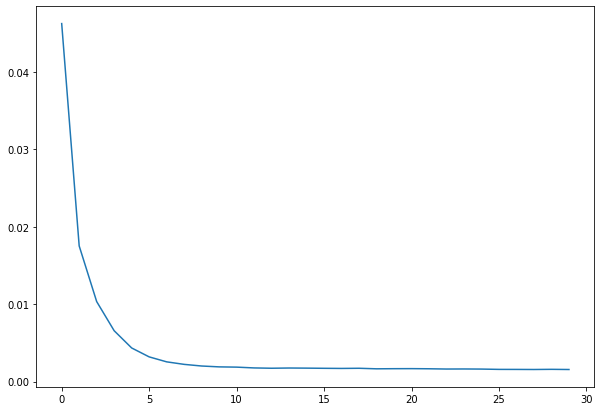

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (10, 7))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.show()

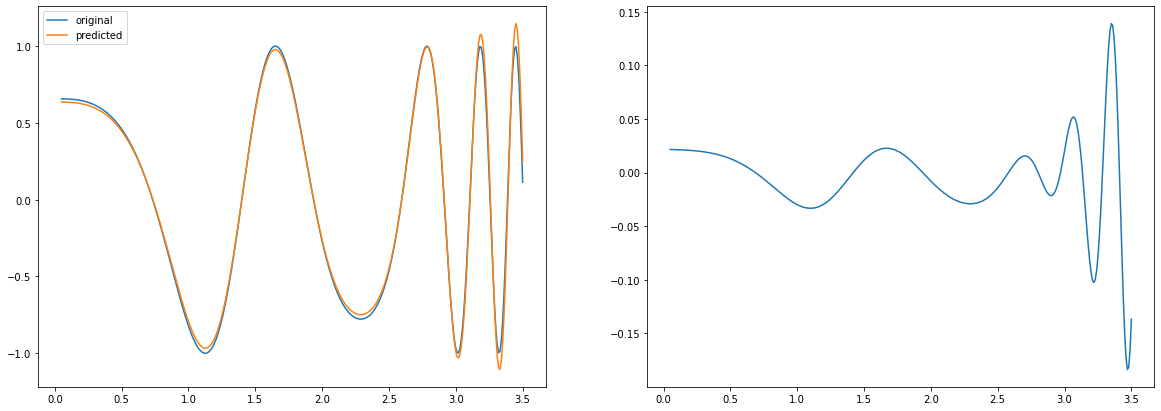

In [ ]:
pred = model.predict(wins)
pred2 = pred.flat
orig = f1(t[winsize:])

err = orig - pred.flat


fig = plt.figure(figsize = (20, 7))
    
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.plot(t[winsize:], orig, label = 'original')
ax1.plot(t[winsize:], pred.flat, label = 'predicted')


ax2.plot(t[winsize:], err)

ax1.legend()

plt.show()

In [ ]:
def f2(t):
    return np.cos(t * t - 2 * t + 3)

def f3(t):
    return 1/3 * np.cos(t * t - 2 * t - np.pi)

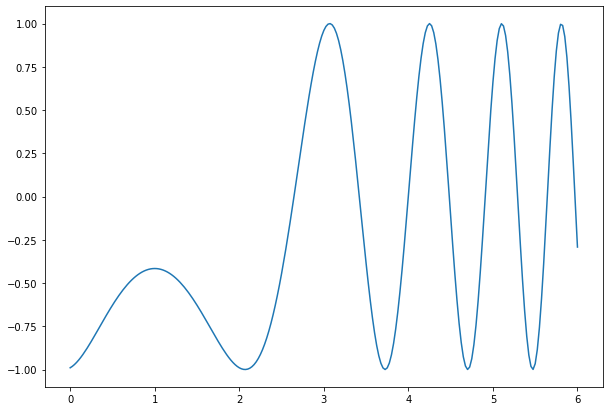

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (10, 7))
t =  np.arange(0, 6.025, 0.025)
plt.plot(t, f2(t))
plt.show()

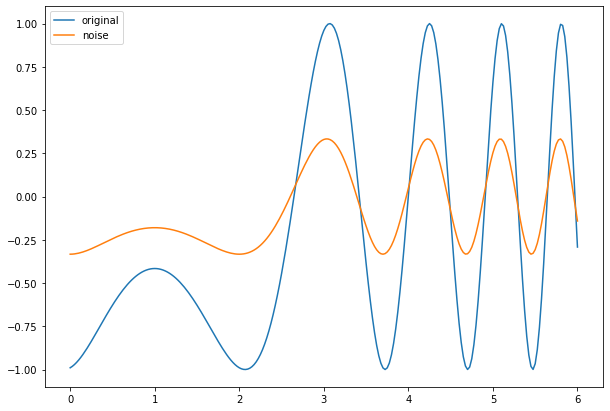

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (10, 7))
plt.plot(t, f2(t), label = 'original')
plt.plot(t, f3(t), label = 'noise')
plt.legend()
plt.show()

In [ ]:
winsize = 5
wins, labels = get_windows(winsize, t, f3, f3)

In [ ]:
model = keras.models.Sequential()

model.add(Dense(1, activation = "linear",  kernel_initializer = keras.initializers.RandomNormal(stddev=0.01), bias_initializer = keras.initializers.Zeros()))
model.compile(tf.keras.optimizers.SGD(0.01), 'mse')

hist = model.fit(wins, labels, batch_size = 1, epochs = 30, shuffle = True)

Epoch 1/30
236/236 [==============================] - 0s 738us/step - loss: 0.0250
Epoch 2/30
236/236 [==============================] - 0s 780us/step - loss: 0.0089
Epoch 3/30
236/236 [==============================] - 0s 735us/step - loss: 0.0069
Epoch 4/30
236/236 [==============================] - 0s 797us/step - loss: 0.0062
Epoch 5/30
236/236 [==============================] - 0s 745us/step - loss: 0.0057
Epoch 6/30
236/236 [==============================] - 0s 714us/step - loss: 0.0052
Epoch 7/30
236/236 [==============================] - 0s 730us/step - loss: 0.0048
Epoch 8/30
236/236 [==============================] - 0s 724us/step - loss: 0.0044
Epoch 9/30
236/236 [==============================] - 0s 720us/step - loss: 0.0041
Epoch 10/30
236/236 [==============================] - 0s 733us/step - loss: 0.0038
Epoch 11/30
236/236 [==============================] - 0s 797us/step - loss: 0.0035
Epoch 12/30
236/236 [==============================] - 0s 725us/step - loss: 0.0032
E

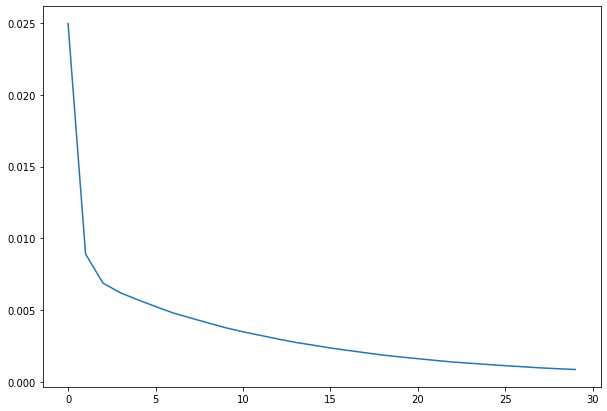

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (10, 7))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.show()

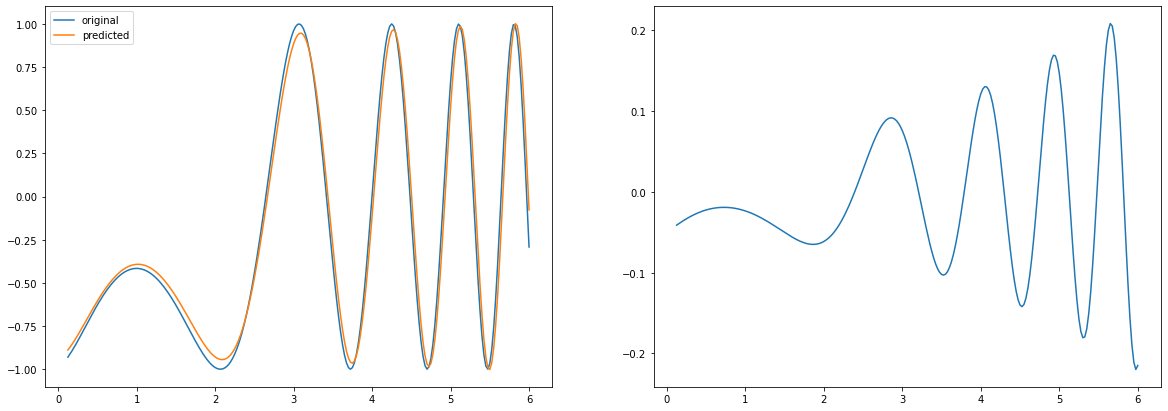

In [ ]:
wins, labels = get_windows(winsize, t, f2, f3)

pred = model.predict(wins)
orig = f2(t[winsize:])

err = orig - pred.flat


fig = plt.figure(figsize = (20, 7))
    
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.plot(t[winsize:], orig, label = 'original')
ax1.plot(t[winsize:], pred.flat, label = 'predicted')


ax2.plot(t[winsize:], err)

ax1.legend()

plt.show()

# Выводы
В ходе выполнения лабораторной работы я познакомился с задачами аппроксимации и фильтрации функции, а также обучил и применил однослойную нейронную сеть для решения этих задач.